In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
from modules import *

In [3]:
G_list, data_list = load_processed_data(G_list_file='G_list_2.pickle',
                                        data_list_file='data_list_2.pickle')

In [4]:
len(data_list)

11531

In [7]:
96.72 * 11531 / 10000

111.527832

In [4]:
idx = 10320
G, data = G_list[idx], data_list[idx]
pos = data.x

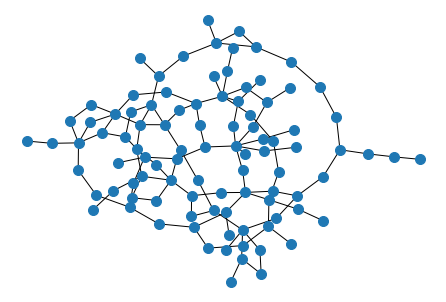

In [144]:
graph_vis(G, ground_truth(G))

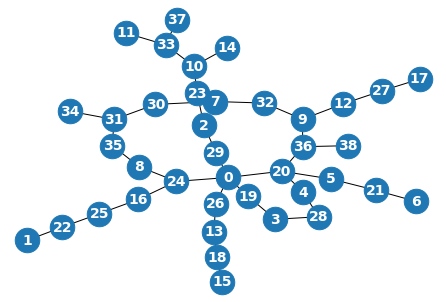

In [7]:
graph_vis(G, get_ground_truth(G), node_size=600, with_labels=True, font_color="white", font_weight="bold", font_size=14)

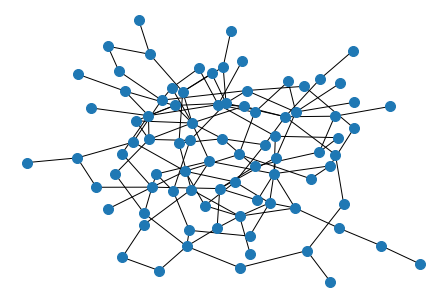

In [5]:
graph_vis(G, get_ground_truth(G))

In [225]:
umap_pos = umap_project(ground_truth(G), n_neighbors=15, min_dist=1)

In [226]:
umap_scale = get_stress_minimizing_scale(umap_pos, data)

In [227]:
scaled_umap_pos = umap_pos * umap_scale

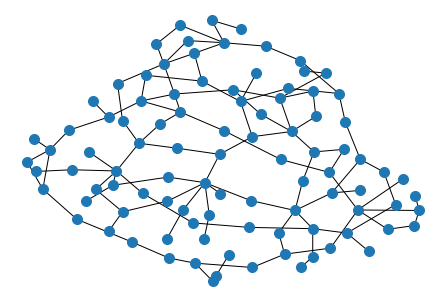

In [228]:
graph_vis(G, scaled_umap_pos)

In [9]:
scaled_ground_truth = pd.read_csv('scaled_gt_loss.csv', index_col=0)
folder_name = f"graphviz_baseline"
if not os.path.isdir(folder_name):
    os.mkdir(folder_name)

In [ ]:
for test_idx in tqdm(range(10000, 11000)):
    G_vis = G_list[test_idx]
    gt_loss = scaled_ground_truth.loc[test_idx][0]
    node_pos = get_ground_truth(G_vis)
    graph_vis(G_vis, node_pos, file_name=f'{folder_name}/{test_idx}_{gt_loss:.2f}.png')

In [7]:
idx = 10263
data, G = data_list[idx], G_list[idx]
criterion = EnergyLossVectorized()
truth = get_ground_truth(G)
scale = get_stress_minimizing_scale(truth, data)

In [8]:
scale

0.013888920323278956

In [9]:
criterion(torch.tensor(truth) * scale, data)

tensor(63.0926, dtype=torch.float64)

In [12]:
get_counter_clockwise_sorted_angle_vertices(np.array([[0,1],[1,0],[1,2],[2,1]]), np.array([[0,0],[0,0],[0,0]]))

array([[1, 0, 2],
       [1, 2, 0]])